# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Data Science Portfolio/Employee Churn Prediction System/

/content/drive/MyDrive/Data Science Portfolio/Employee Churn Prediction System


# Load Dataset


In [5]:
employee_df = pd.read_csv("Human_Resources.csv")
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
# check for missing values
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

In [9]:
# replace 'Attritition', 'overtime', 'Over18' column with integers
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x : 1 if x == "Yes" else 0)
employee_df["Over18"] = employee_df["Over18"].apply(lambda x : 1 if x == "Y" else 0)

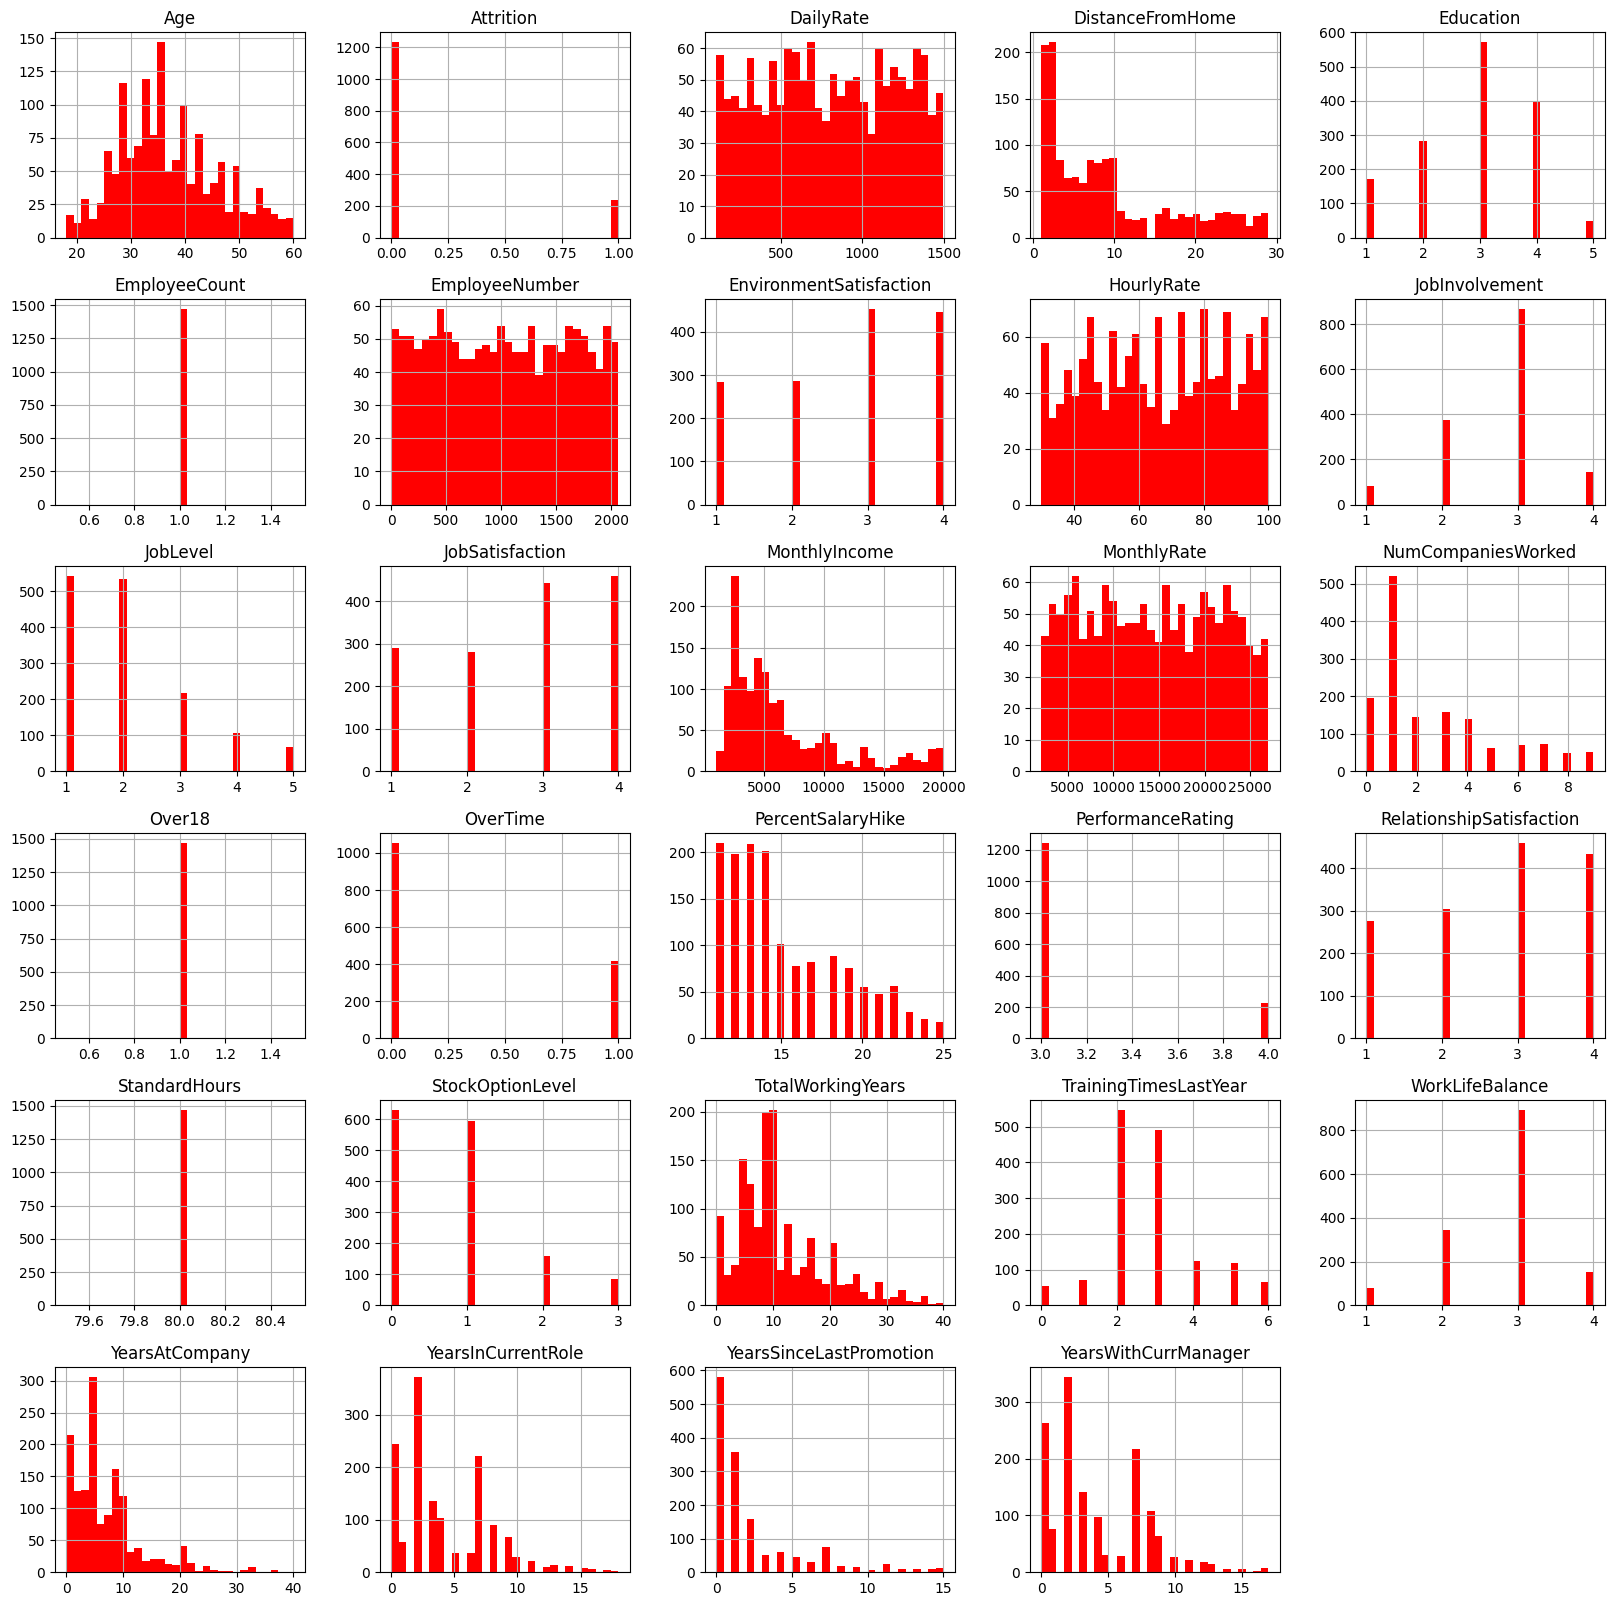

In [10]:
# histogram visualization of all columns
employee_df.hist(bins = 30, figsize = (20,20), color = 'r' )
plt.show()
# lot of people are between 30 & 40 years
# lot of employees decided are staying
# lot of employees live close to work
# lot are level of eduaction 3 prbably bachelor degree
# lot of employees salary around 2000 & 5000
# lot of employees got salary hike from 0 to 15%
# lot of employees has total working years between 0 & 10 years
# lot of employees has years at the company between 0 & 10 years

In [11]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# drop "EmployeeCount", "EmployeeNumber", "StandardHours", "Over18" since they do not change from one employee to another
employee_df.drop(["EmployeeCount" , "EmployeeNumber" , "StandardHours" , "Over18" ], axis = 1, inplace = True)

In [13]:
# check number of employees who stayed and left the company
stayed_df = employee_df[employee_df["Attrition"] == 0]
left_df = employee_df[employee_df["Attrition"] == 1]

In [14]:
# number of employees who stayed and left
print("Total number of employees =",len(employee_df))
print("Number of employees who left =", len(left_df))
print("Percantage of employees who left the company =", len(left_df)/len(employee_df) * 100, "%")

Total number of employees = 1470
Number of employees who left = 237
Percantage of employees who left the company = 16.122448979591837 %


In [15]:
# number of employees who stayed
print("Total number of employees =",len(employee_df))
print("Number of employees who stayed =", len(stayed_df))
print("Percantage of employees who stayed =", len(stayed_df)/len(employee_df) * 100, "%")

Total number of employees = 1470
Number of employees who stayed = 1233
Percantage of employees who stayed = 83.87755102040816 %


In [16]:
stayed_df.describe()
# "age": mean age of the employees who stayed is higher compared to who left
# "DailyRate": rate of employees who stayed is higher
# "DistanceFromHome": employees who stayed live closer to home
# "EnvironmentSatisfaction": employees who stayed are more satisifed with their jobs
# "StockOptionLevel": employees who stayed have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [17]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


<ipython-input-18-6da494960d12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = employee_df.corr()


<Axes: >

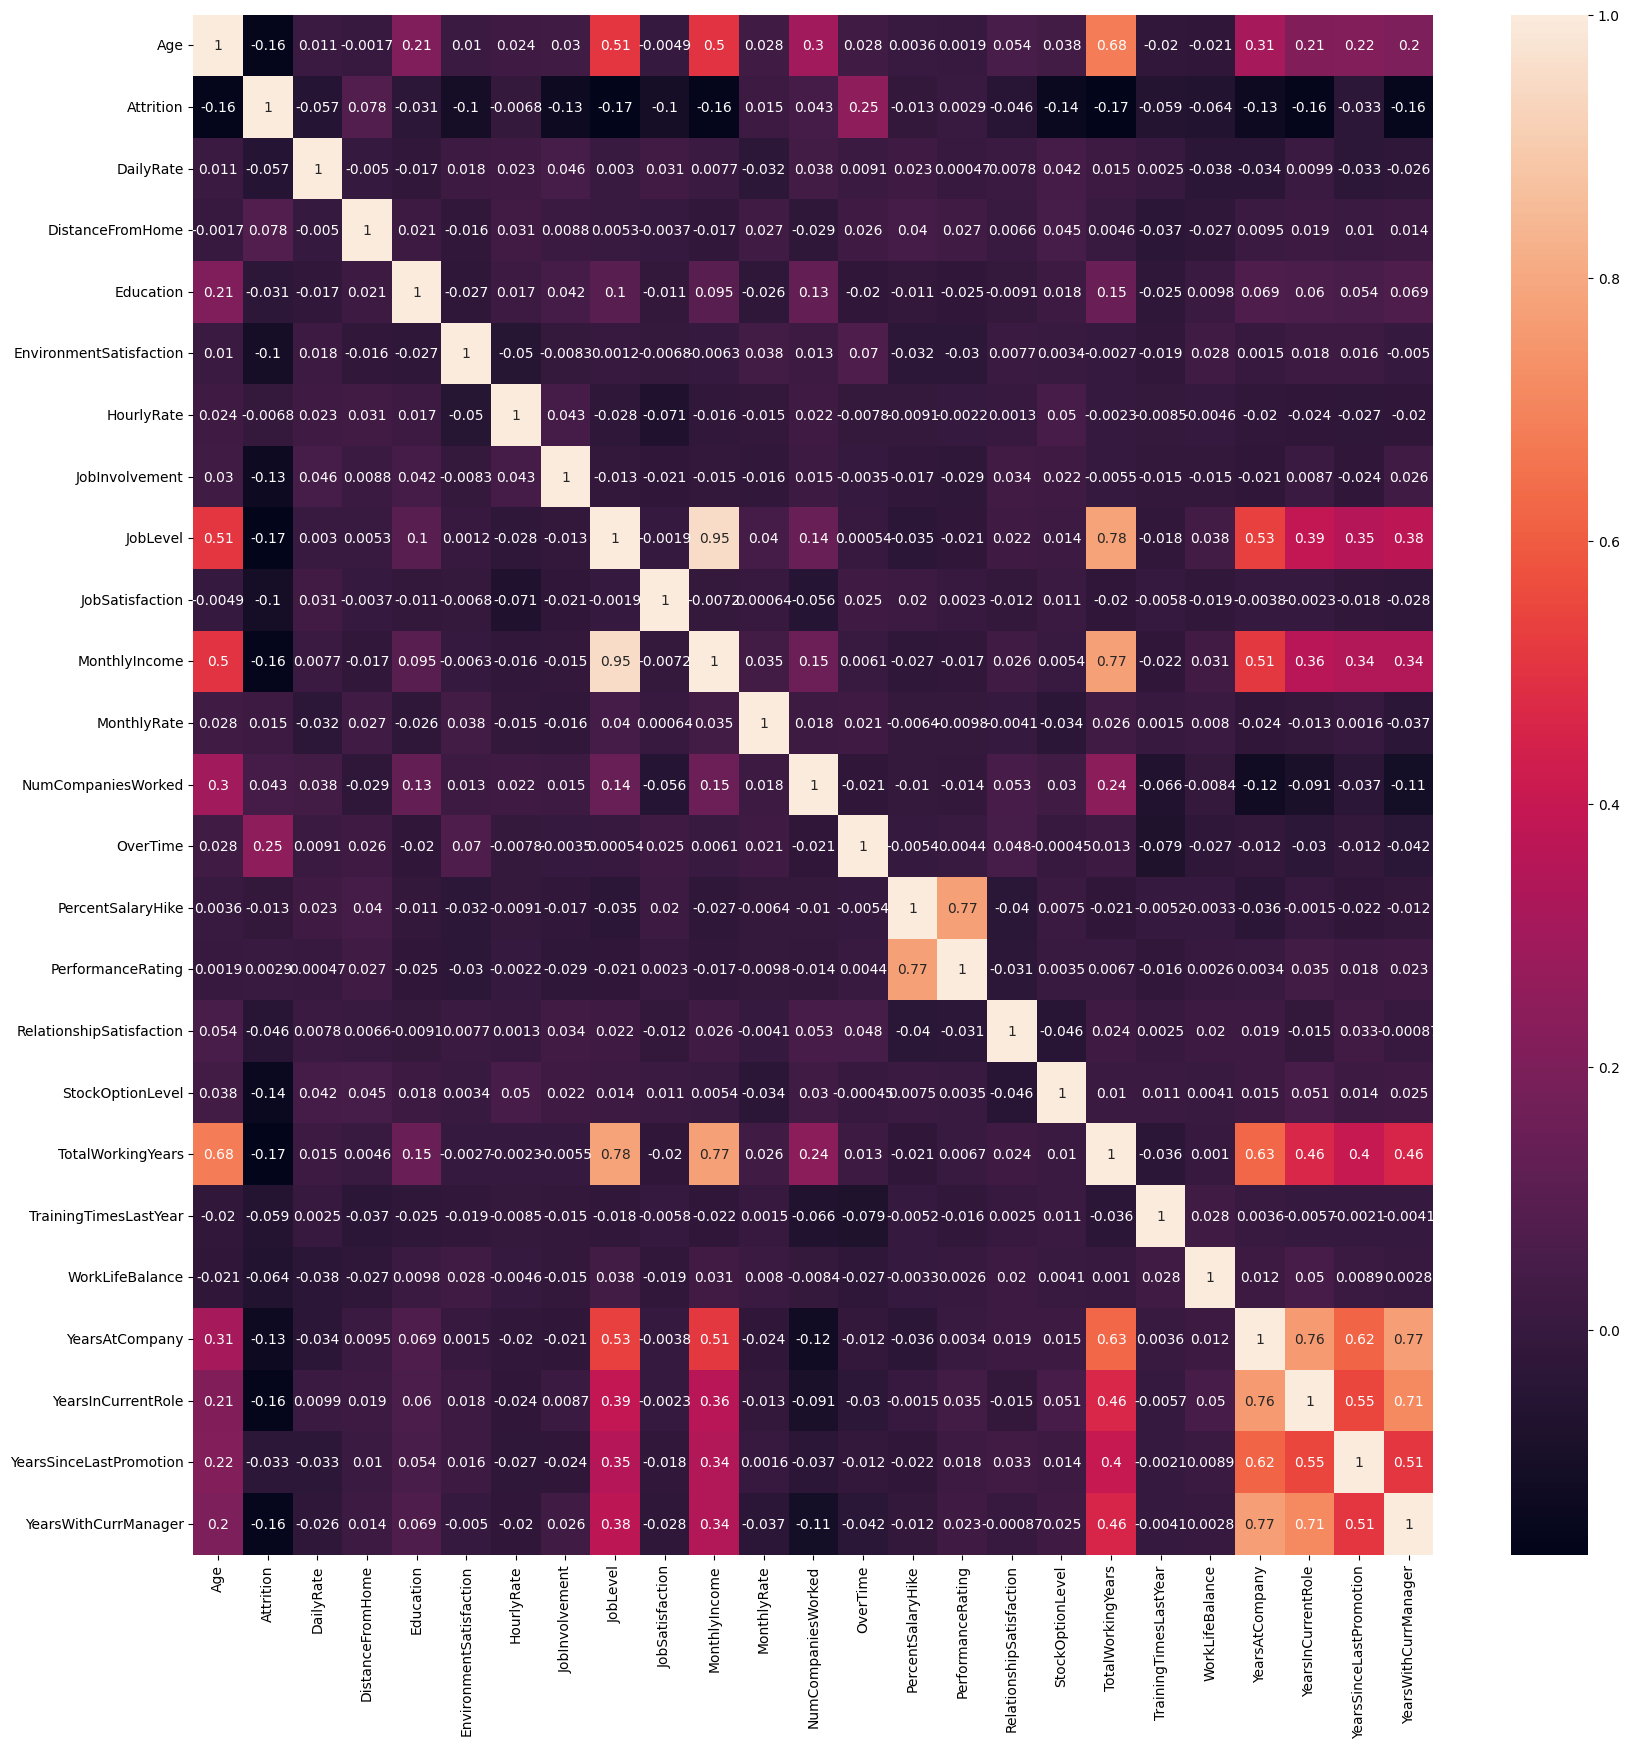

In [18]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True )
# age is stongly correlated with monthly income
# job level is strongly correlated with total working hours
# monthly income is strongly correlated with job level
# monthly income is strongly correlated with total working hours

Text(0.5, 1.0, 'Age vs Attrition ')

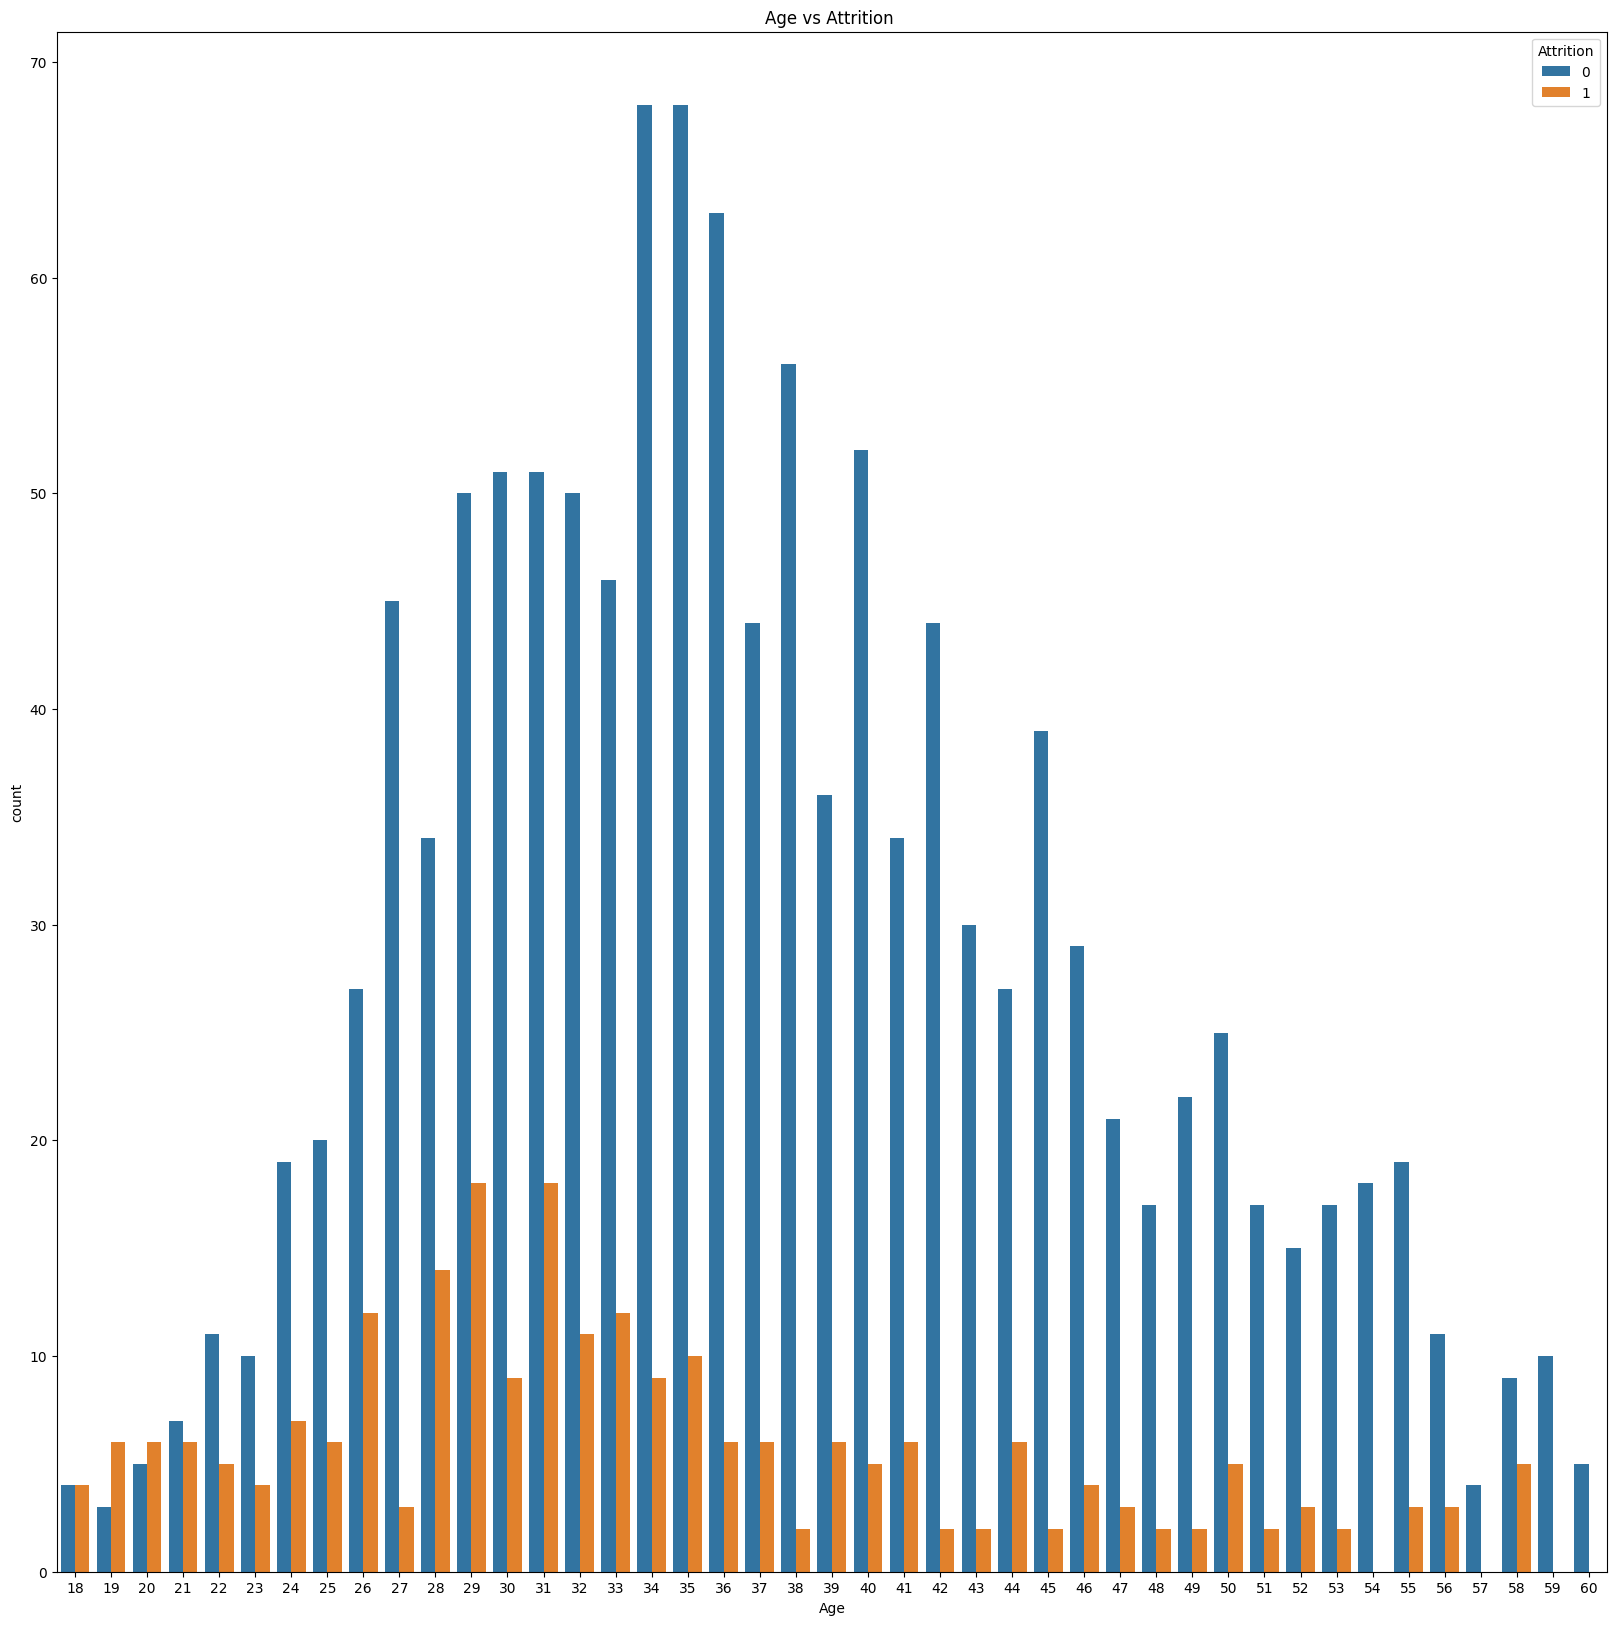

In [ ]:
# younger employees tend to leave more
plt.figure(figsize = (20, 20))
sns.countplot(x = "Age", hue = "Attrition", data = employee_df )
plt.title("Age vs Attrition ")

<Axes: xlabel='JobLevel', ylabel='count'>

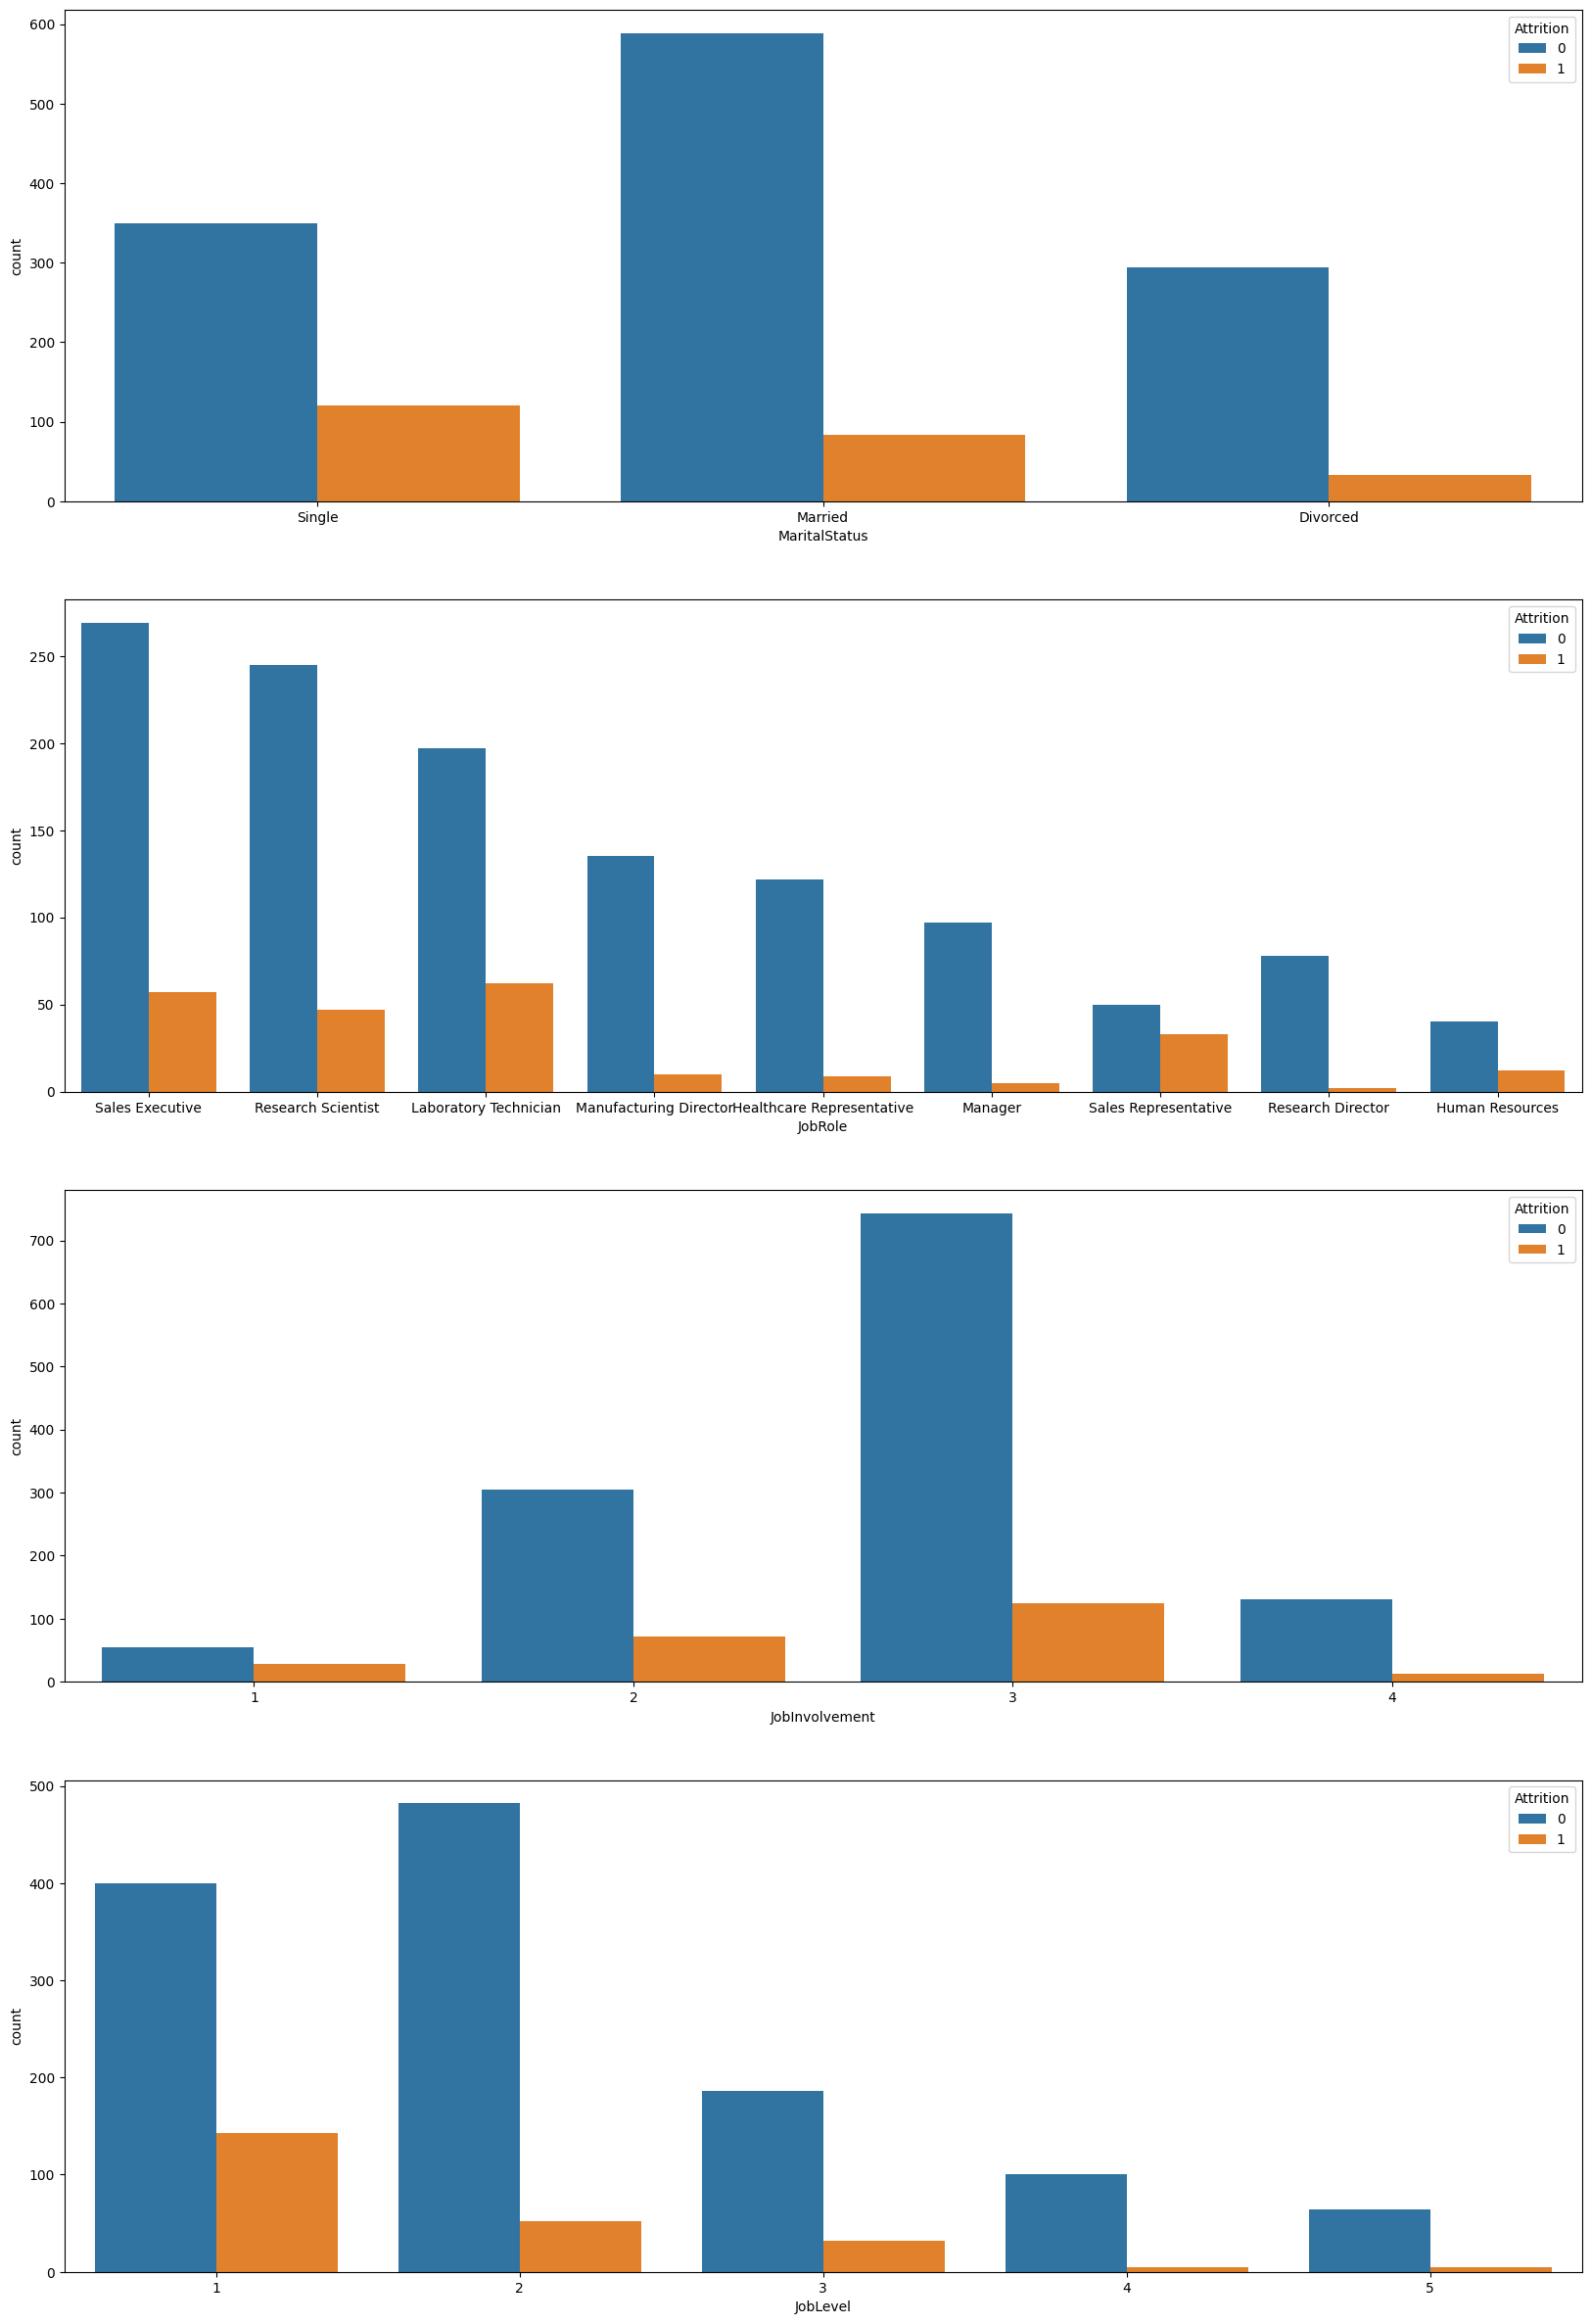

In [ ]:
# single employees tend to leave compared to married and divorced
# sales representitives tend to leave compared to any other job
# less involved employees tend to leave the company
# less experienced (low job level) tend to leave the company
plt.figure(figsize=[20,30])
plt.subplot(4,1,1)
sns.countplot(x = "MaritalStatus" , hue = "Attrition" , data = employee_df )
plt.subplot(4,1,2)
sns.countplot(x = "JobRole" , hue = "Attrition" , data = employee_df )
plt.subplot(4,1,3)
sns.countplot(x = "JobInvolvement" , hue = "Attrition" , data = employee_df )
plt.subplot(4,1,4)
sns.countplot(x = "JobLevel" , hue = "Attrition" , data = employee_df )

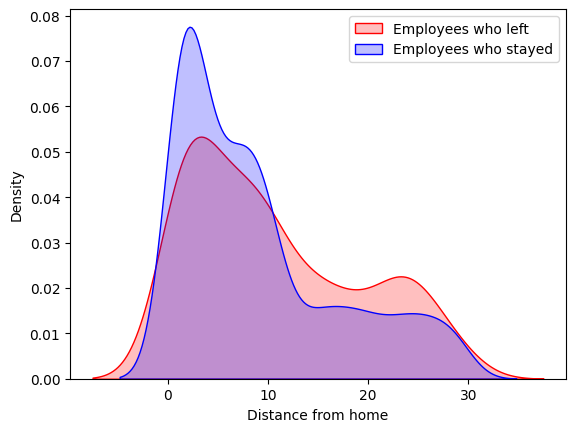

In [ ]:
# employees living far from work tend to leave more
sns.kdeplot(left_df["DistanceFromHome"] , label = "Employees who left" , fill = True,  color = 'r')
sns.kdeplot(stayed_df["DistanceFromHome"] , label = "Employees who stayed" , fill = True, color = 'b')

plt.xlabel('Distance from home')
plt.legend()

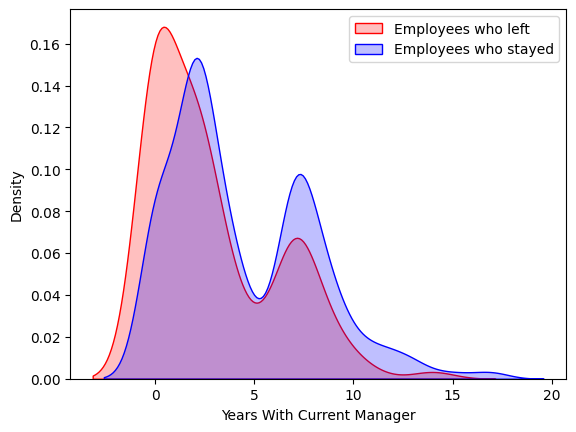

In [ ]:
# employees tend to leave more at the begining of their work with managers but retention improves over time
sns.kdeplot(left_df["YearsWithCurrManager"] , label = "Employees who left" , fill = True,  color = 'r')
sns.kdeplot(stayed_df["YearsWithCurrManager"] , label = "Employees who stayed" , fill = True, color = 'b')

plt.xlabel('Years With Current Manager')
plt.legend()

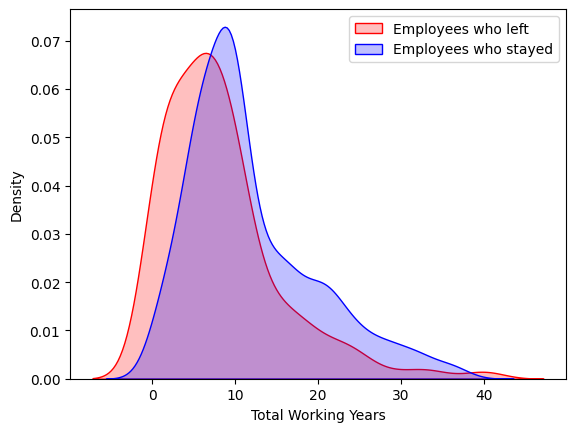

In [ ]:
# employees tend to leave more at the begining of their work but retention improves over time
sns.kdeplot(left_df["TotalWorkingYears"] , label = "Employees who left" , fill = True,  color = 'r')
sns.kdeplot(stayed_df["TotalWorkingYears"] , label = "Employees who stayed" , fill = True, color = 'b')

plt.xlabel('Total Working Years')
plt.legend()

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

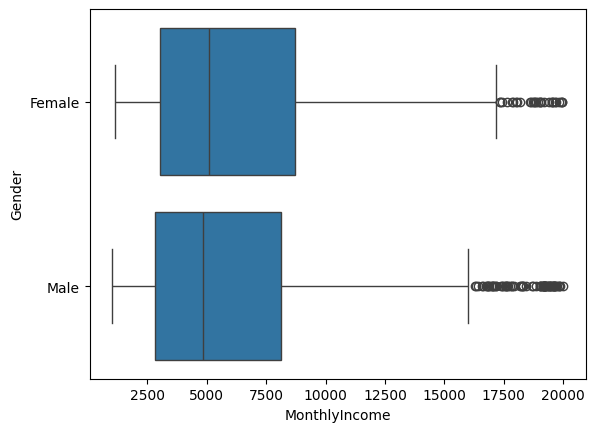

In [ ]:
# Gender equality in salaries
sns.boxplot( x = "MonthlyIncome", y = "Gender", data = employee_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

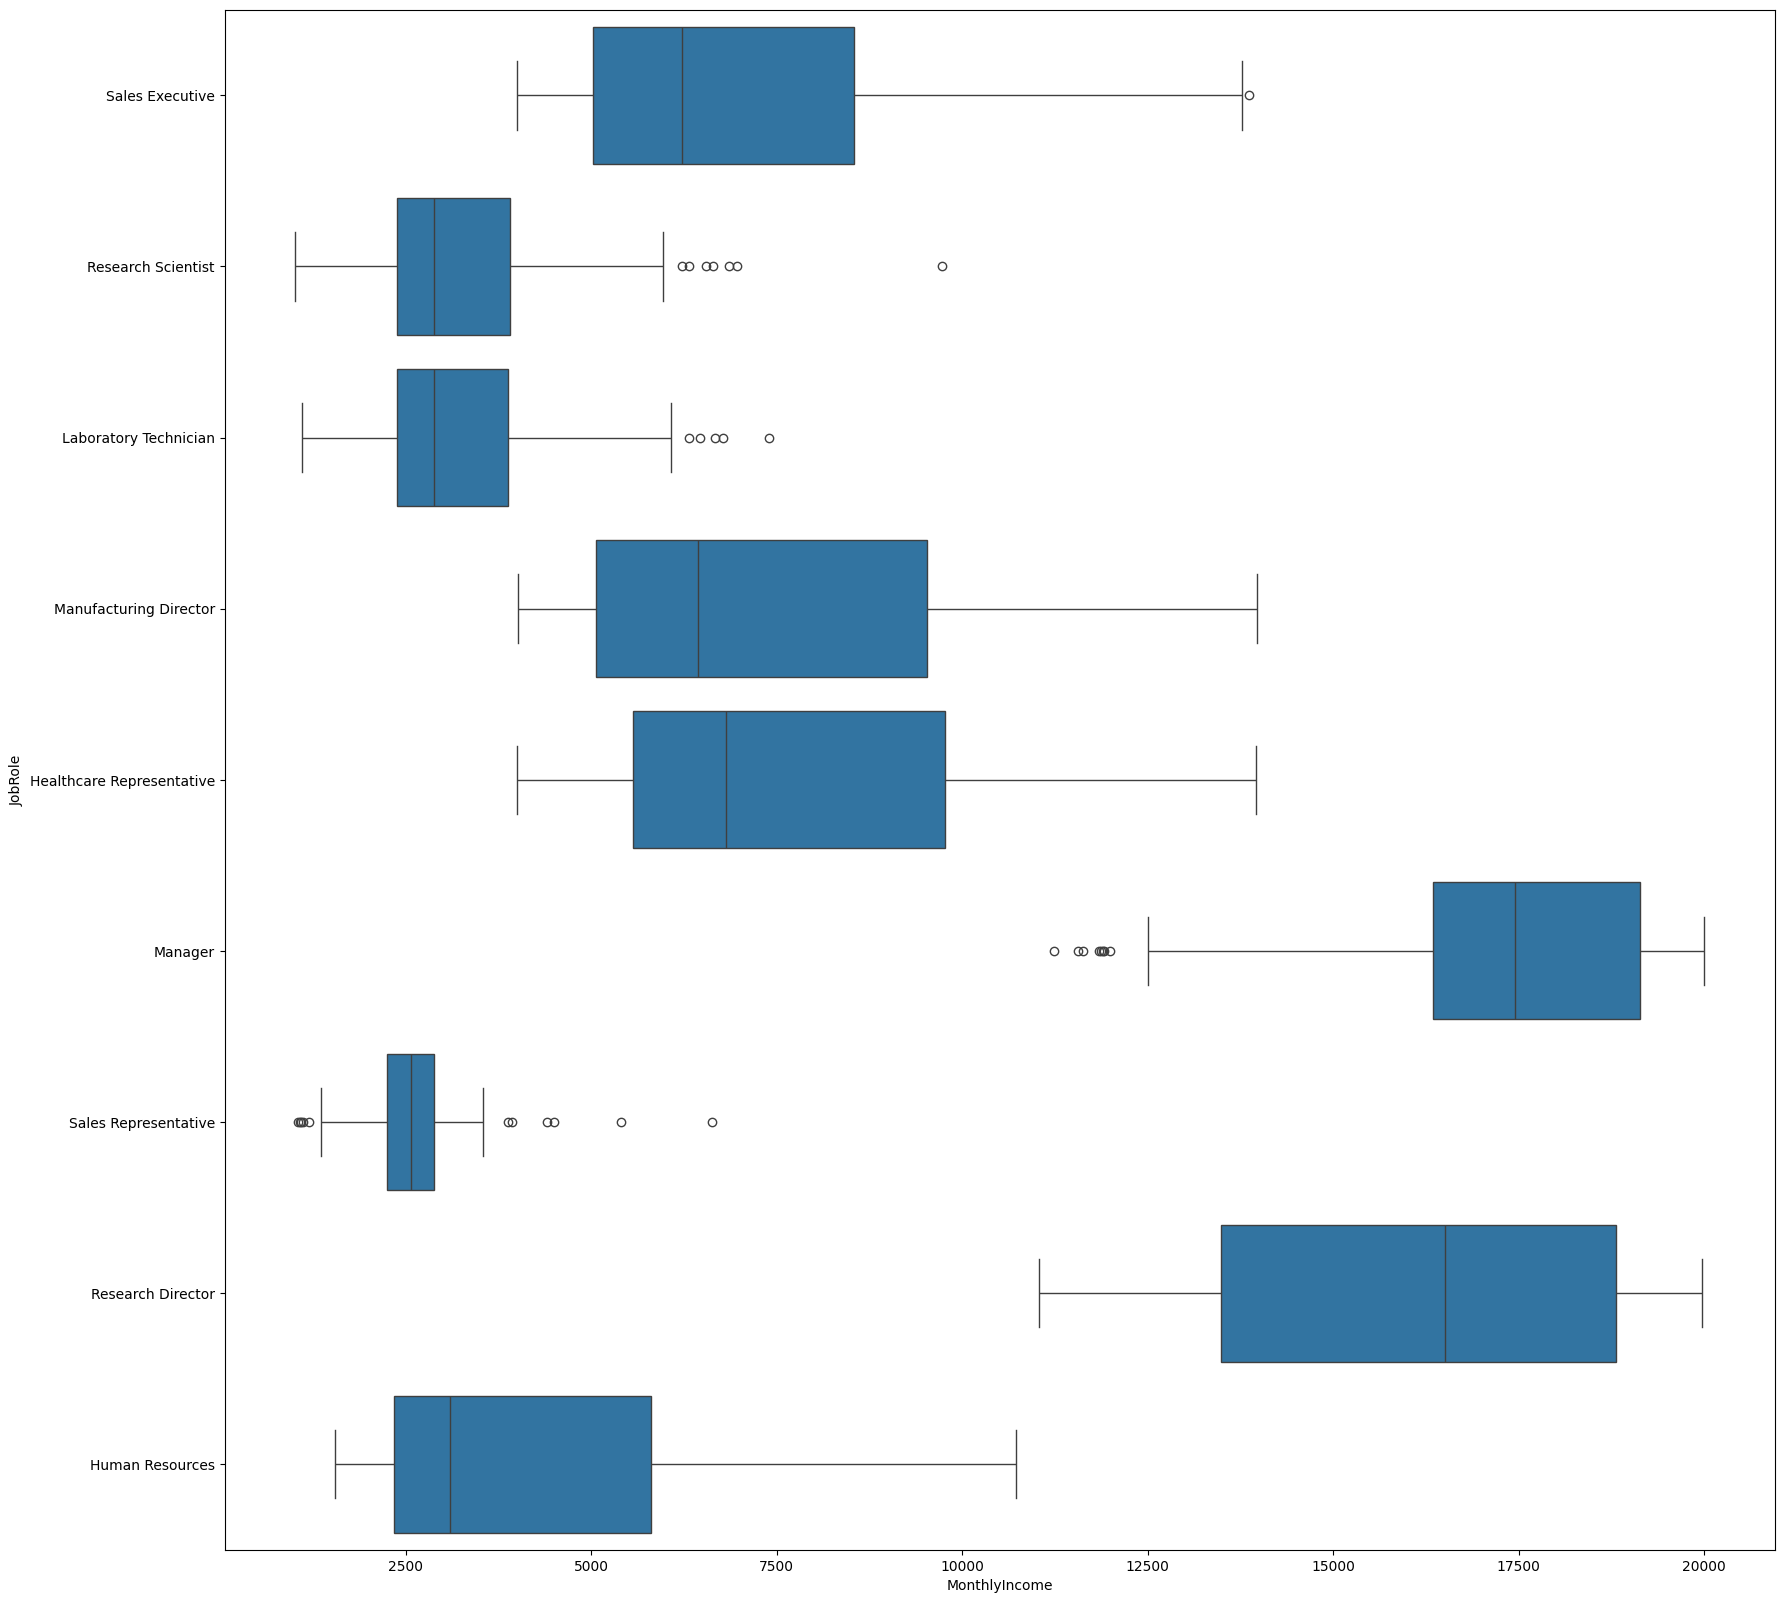

In [ ]:
plt.figure(figsize=[20,20])
sns.boxplot( x = "MonthlyIncome", y = "JobRole", data = employee_df)
# managers has highest salaries followed by research director
# sales representative has the least salaries

# Data Preprocessing

## Split Data

In [19]:
x = employee_df.drop(['Attrition'], axis = 1 )
y = employee_df['Attrition']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size=0.2)

In [21]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Apply OHE

In [ ]:
# printing categorical features
for col in x.select_dtypes('object').columns:
    print(f'{col} --> {x[col].nunique()}')

BusinessTravel --> 3
Department --> 3
EducationField --> 6
Gender --> 2
JobRole --> 9
MaritalStatus --> 3


In [22]:
ohe_col = ['BusinessTravel' , 'Department' , 'EducationField' , 'Gender' , 'JobRole' , 'MaritalStatus']

In [23]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False)

In [24]:
# applying one hot encoder
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train[ohe_col]), columns=ohe.get_feature_names_out(ohe_col))
x_test_ohe = pd.DataFrame(ohe.transform(x_test[ohe_col]), columns=ohe.get_feature_names_out(ohe_col))

In [25]:
# reset index
x_train.reset_index(drop=True, inplace=True)
x_train_ohe.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
x_test_ohe.reset_index(drop=True, inplace=True)

In [27]:
# concatenating encoded columns
x_train = pd.concat([x_train, x_train_ohe], axis=1)
x_test = pd.concat([x_test, x_test_ohe], axis=1)

In [28]:
# dropping old columns
x_train.drop(ohe_col, axis=1, inplace=True)
x_test.drop(ohe_col, axis=1, inplace=True)

## Scale Data

In [30]:
scaler = RobustScaler()

In [31]:
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

# fit and transform on the training set
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

# transform on the test set
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])


## Balance Data

In [35]:
# smote = SMOTETomek(sampling_strategy={1: 700}, random_state=24)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [36]:
# y_train_resampled.value_counts()

0    981
1    699
Name: Attrition, dtype: int64

# Binary Classification Model Evaluation

In [32]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Gaussian NB":GaussianNB(),
    "KNeighbors Classifier":KNeighborsClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "SVC":SVC(),
    "Random Forest Classifier":RandomForestClassifier(),
    "XGB Classifier":XGBClassifier()
}

In [33]:
# model evaluation
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    score_test = accuracy_score(y_test, y_pred_test)
    score_train = accuracy_score(y_train, y_pred_train)
    print(f"The train accuracy of {name} is {score_train*100}%")
    print(f"The test accuracy of {name} is {score_test*100}%")
    print(30*"=")
# logistic regression is the best

The train accuracy of Logistic Regression is 89.28571428571429%
The test accuracy of Logistic Regression is 87.75510204081633%
The train accuracy of Gaussian NB is 68.28231292517006%
The test accuracy of Gaussian NB is 63.26530612244898%
The train accuracy of KNeighbors Classifier is 87.07482993197279%
The test accuracy of KNeighbors Classifier is 86.05442176870748%
The train accuracy of Decision Tree Classifier is 100.0%
The test accuracy of Decision Tree Classifier is 77.89115646258503%
The train accuracy of SVC is 91.15646258503402%
The test accuracy of SVC is 86.73469387755102%
The train accuracy of Random Forest Classifier is 100.0%
The test accuracy of Random Forest Classifier is 86.39455782312925%
The train accuracy of XGB Classifier is 100.0%
The test accuracy of XGB Classifier is 86.05442176870748%


In [37]:
# # model evaluation using resampled data
# for name,model in models.items():
#     model.fit(x_train_resampled,y_train_resampled)
#     y_pred_test = model.predict(x_test)
#     score_test = accuracy_score(y_pred_test, y_test)
#     y_pred_train = model.predict(x_train_resampled)
#     score_train = accuracy_score(y_pred_train,y_train_resampled)
#     print(f"The train accuracy of {name} is {score_train*100}%")
#     print(f"The test accuracy of {name} is {score_test*100}%")
#     print(30*"=")

The train accuracy of Logistic Regression is 83.80952380952381%
The test accuracy of Logistic Regression is 75.17006802721087%
The train accuracy of Gaussian NB is 64.82142857142857%
The test accuracy of Gaussian NB is 54.08163265306123%
The train accuracy of KNeighbors Classifier is 85.95238095238096%
The test accuracy of KNeighbors Classifier is 65.3061224489796%
The train accuracy of Decision Tree Classifier is 100.0%
The test accuracy of Decision Tree Classifier is 78.57142857142857%
The train accuracy of SVC is 94.82142857142857%
The test accuracy of SVC is 83.6734693877551%
The train accuracy of Random Forest Classifier is 100.0%
The test accuracy of Random Forest Classifier is 87.41496598639455%
The train accuracy of XGB Classifier is 100.0%
The test accuracy of XGB Classifier is 87.41496598639455%


In [34]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<Axes: >

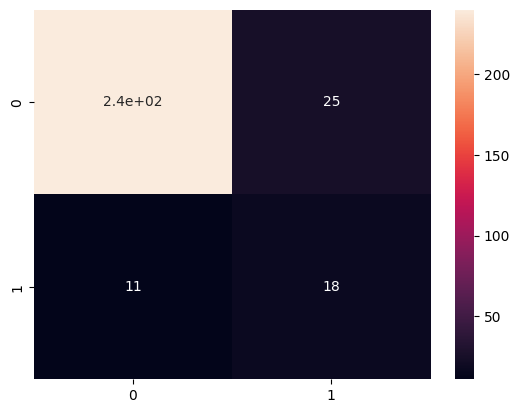

In [38]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm , annot = True)

In [39]:
# precision & recall for class 1 is not good due to data imbalance
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       265
           1       0.42      0.62      0.50        29

    accuracy                           0.88       294
   macro avg       0.69      0.76      0.72       294
weighted avg       0.90      0.88      0.89       294



## ANN

In [40]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [41]:
model = Sequential()
model.add(Dense(200, activation = 'relu',input_dim = 44))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
24/24 [==============================] - 0s 5ms/step - loss: 7.5542e-05 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 7.3188e-05 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 7.1170e-05 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 6.9268e-05 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 6.7511e-05 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 6.5411e-05 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 6.3822e-05 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 6.1892e-05 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 5.9985e-05 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss:

In [48]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100}%")

Test Accuracy: 84.35374149659864%


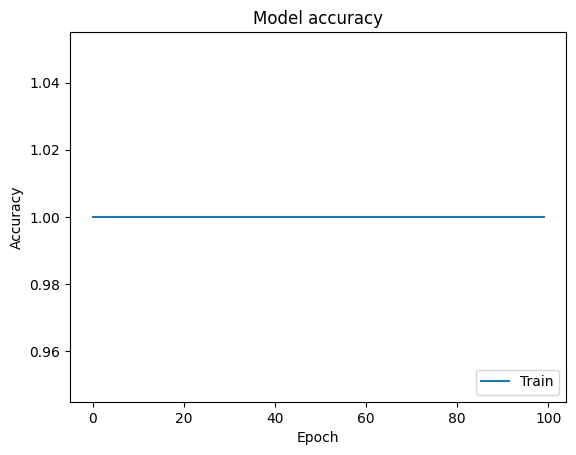

In [50]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='lower right')

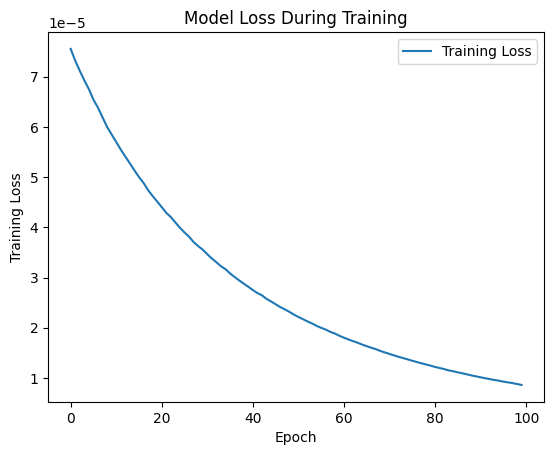

In [51]:
# model loss
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

<Axes: >

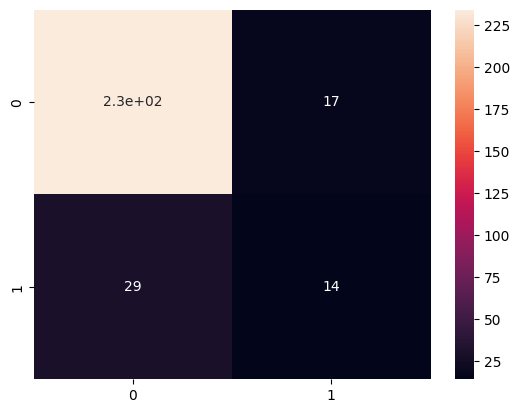

In [52]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [53]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       251
           1       0.45      0.33      0.38        43

    accuracy                           0.84       294
   macro avg       0.67      0.63      0.64       294
weighted avg       0.83      0.84      0.83       294

